In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/supermarket sales.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
info = df.info()
describe = df.describe(include='all')
value_counts = df.nunique()
missing_values = df.isnull().sum()

info, describe, value_counts, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


(None,
         Gender   Invoice ID Branch    City Customer type         Product line  \
 count     1000         1000   1000    1000          1000                 1000   
 unique       2         1000      3       3             2                    6   
 top     Female  347-56-2442      A  Yangon        Member  Fashion accessories   
 freq       501            1    340     340           501                  178   
 mean       NaN          NaN    NaN     NaN           NaN                  NaN   
 std        NaN          NaN    NaN     NaN           NaN                  NaN   
 min        NaN          NaN    NaN     NaN           NaN                  NaN   
 25%        NaN          NaN    NaN     NaN           NaN                  NaN   
 50%        NaN          NaN    NaN     NaN           NaN                  NaN   
 75%        NaN          NaN    NaN     NaN           NaN                  NaN   
 max        NaN          NaN    NaN     NaN           NaN                  NaN   
 
       

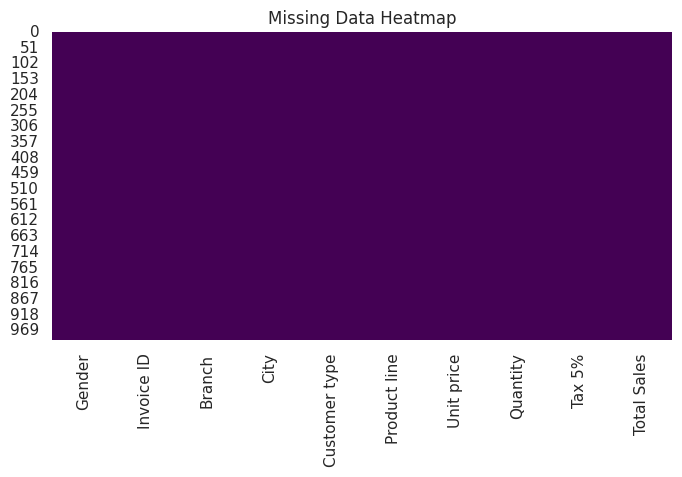

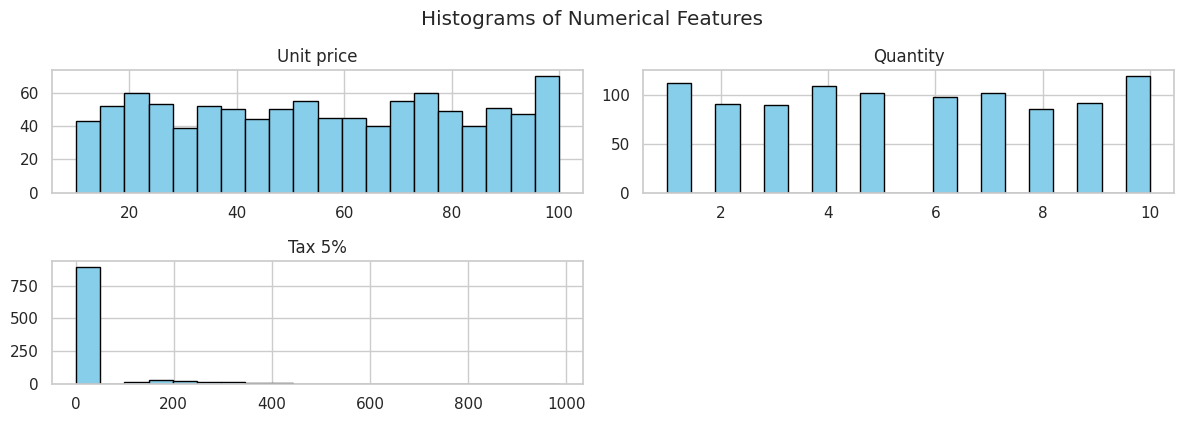

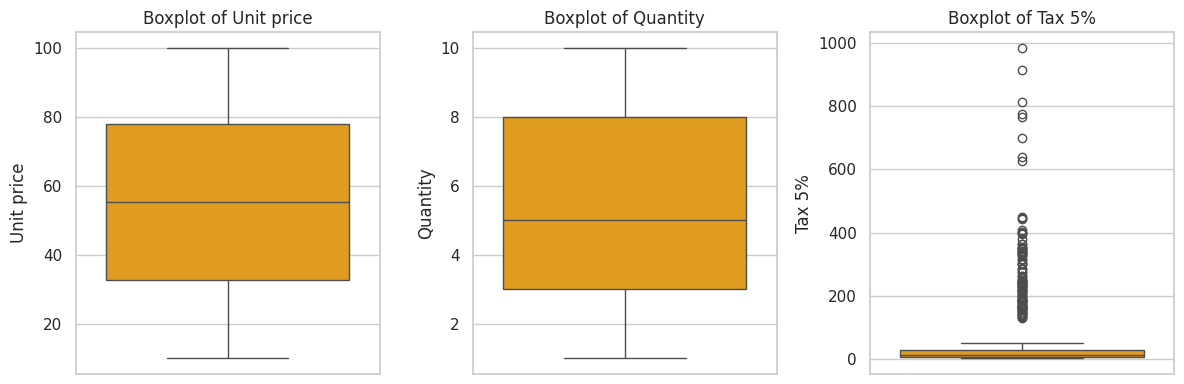

/tmp/ipython-input-4-3025486729.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
/tmp/ipython-input-4-3025486729.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
/tmp/ipython-input-4-3025486729.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
/tmp/ipython-input-4-3025486729.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

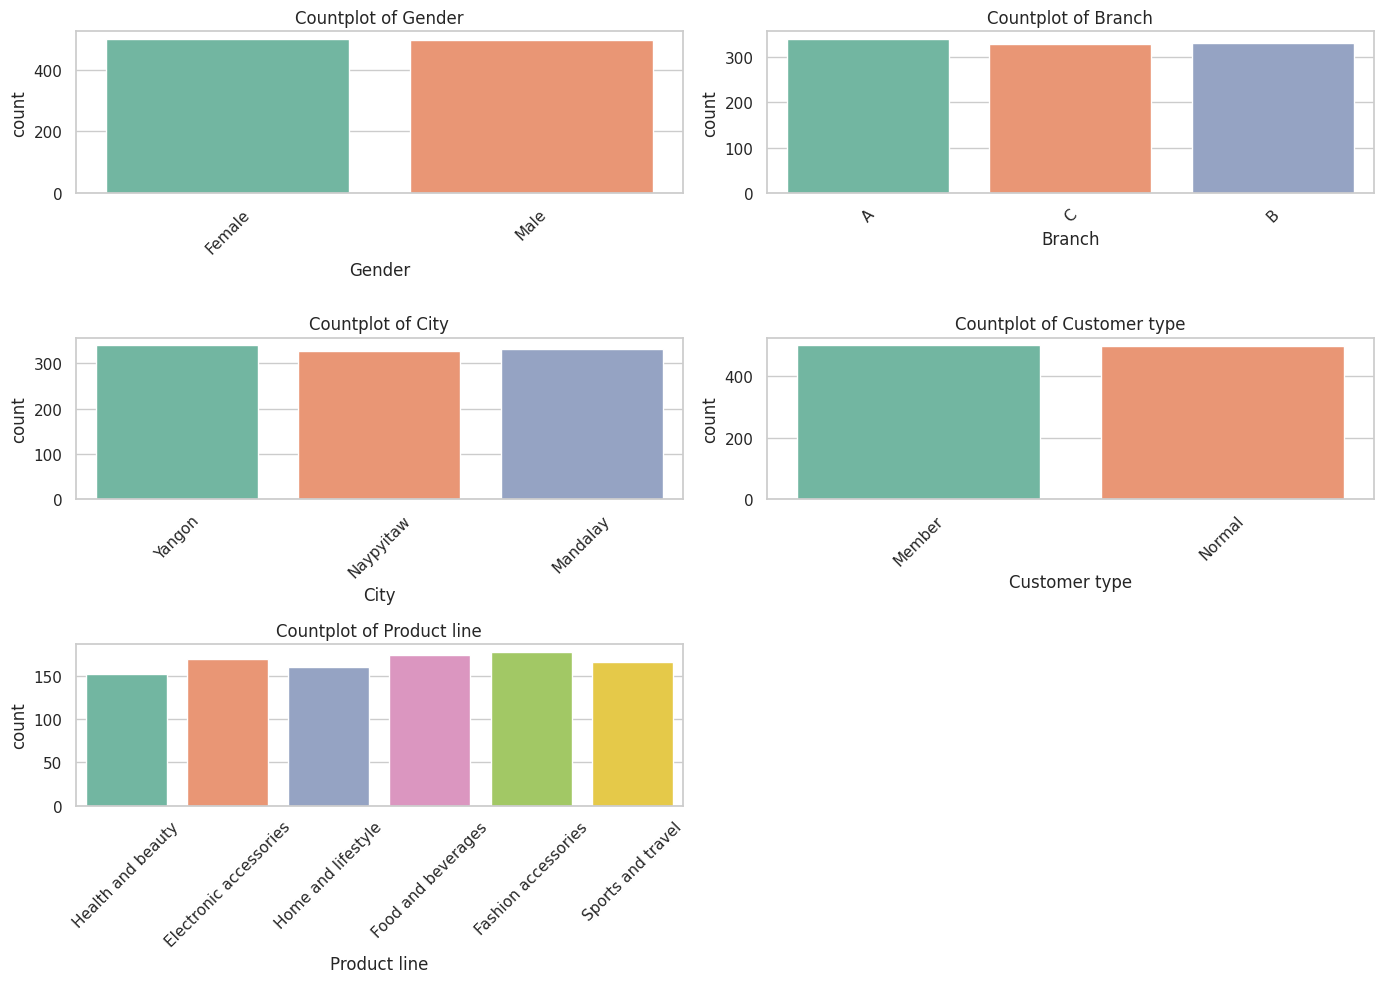

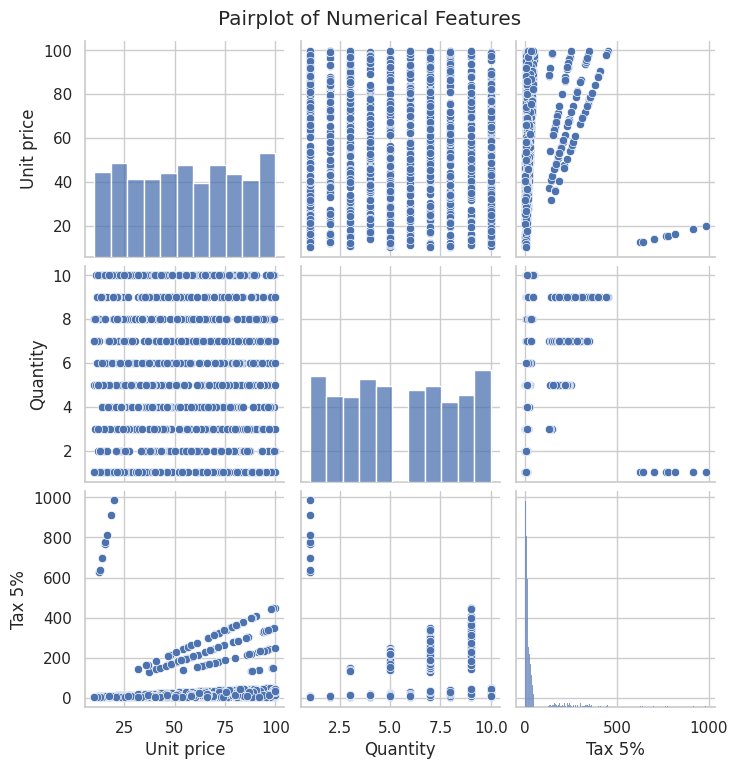

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# 1. Visualize missing data heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# 2. Distribution: Histograms
num_cols = ['Unit price', 'Quantity', 'Tax 5%']
df[num_cols].hist(figsize=(12, 4), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", y=1.05)
plt.show()

# 3. Boxplots for outlier detection
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 4. Countplot for categorical variables
cat_cols = ['Gender', 'Branch', 'City', 'Customer type', 'Product line']
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

# 5. Pairplot for relationship overview
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()




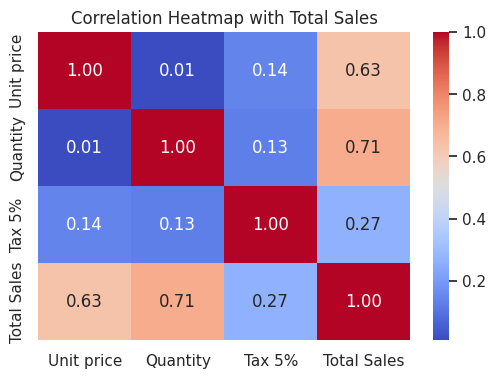

(                       Total Sales         Quantity      
                                sum    mean      sum  mean
 Product line                                             
 Electronic accessories    51750.03  304.41      971  5.71
 Fashion accessories       51719.90  290.56      902  5.07
 Food and beverages        53471.28  307.31      952  5.47
 Health and beauty         46851.18  308.23      854  5.62
 Home and lifestyle        51297.06  320.61      911  5.69
 Sports and travel         52497.93  316.25      920  5.54,
               sum    mean
 Branch                   
 A       101143.21  297.48
 B       101140.64  304.64
 C       105303.53  321.05,
                      sum    mean
 Customer type                   
 Member         156403.28  312.18
 Normal         151184.10  302.97)

In [3]:
# 1. Correlation Heatmap (already created for numerical variables)
# Now let's include derived variable: Total Sales = Unit Price * Quantity
df['Total Sales'] = df['Unit price'] * df['Quantity']

# Updated correlation matrix including Total Sales
corr_matrix_ext = df[['Unit price', 'Quantity', 'Tax 5%', 'Total Sales']].corr()

# Plot the updated heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_ext, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Total Sales")
plt.show()

# 2. Grouping and Aggregation: Category-level Patterns

# Group by Product line and summarize Total Sales, Quantity
grouped_product = df.groupby("Product line")[["Total Sales", "Quantity"]].agg(['sum', 'mean']).round(2)

# Group by Branch and summarize Total Sales
grouped_branch = df.groupby("Branch")["Total Sales"].agg(['sum', 'mean']).round(2)

# Group by Customer Type and summarize Total Sales
grouped_customer = df.groupby("Customer type")["Total Sales"].agg(['sum', 'mean']).round(2)

grouped_product, grouped_branch, grouped_customer
